# Building a Simple Neural Network from Scratch

In this notebook, I demonstrate how to implement a simple neural network from scratch using Python and NumPy. The example showcases the full process, from data preprocessing to forward and backward propagation, and includes loss calculation and parameter updates. It provides a step-by-step guide to help you understand the inner workings of a neural network, including the activation functions and gradient computation. This notebook serves as a foundation for more complex models.

This `NeuralNetwork` class implements a simple feedforward neural network with one hidden layer. It uses the ReLU activation function for the hidden layer and softmax for the output layer. The class supports forward propagation, backpropagation for training, and loss computation using cross-entropy. It includes methods for training the model with gradient descent, updating weights, and plotting the loss over epochs. The `predict` method outputs the class with the highest probability from the softmax activation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
  def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
    self.weights_input_to_hidden = 0.01 * np.random.rand(input_size, hidden_size)
    self.weights_hidden_to_output = 0.01 * np.random.rand(hidden_size, output_size)

    self.bias_hidden = np.zeros((1, hidden_size))
    self.bias_output = np.zeros((1, output_size))

    self.learning_rate = learning_rate

  def relu(self, x):
    return np.maximum(0, x)

  def relu_derivative(self, x):
    return (x>0).astype(float)

  def softmax(self, x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

  def compute_loss(self, y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m
    return loss

  def forward(self, x):
    self.z_hidden = np.dot(x, self.weights_input_to_hidden) + self.bias_hidden
    self.a_hidden = self.relu(self.z_hidden)

    self.z_output = np.dot(self.a_hidden, self.weights_hidden_to_output) + self.bias_output
    self.a_output = self.softmax(self.z_output)

    return self.a_output

  def backward(self, x, y_true):
    m = y_true.shape[0]

    # Gradients for output layer
    dz_output = self.a_output - y_true
    dw_hidden_to_output = np.dot(self.a_hidden.T, dz_output) / m
    db_output = np.sum(dz_output, axis=0, keepdims=True) / m

    # Gradients for hidden layer
    da_hidden = np.dot(dz_output, self.weights_hidden_to_output.T)
    dz_hidden = da_hidden * self.relu_derivative(self.z_hidden)
    dw_input_to_hidden = np.dot(x.T, dz_hidden) / m
    db_hidden = np.sum(dz_hidden, axis=0, keepdims=True) / m

    return dw_input_to_hidden, db_hidden, dw_hidden_to_output, db_output

  def update_parameters(self, dw_input_to_hidden, db_hidden, dw_hidden_to_output, db_output):
    self.weights_input_to_hidden -= self.learning_rate * dw_input_to_hidden
    self.bias_hidden -= self.learning_rate * db_hidden

    self.weights_hidden_to_output -= self.learning_rate * dw_hidden_to_output
    self.bias_output -= self.learning_rate * db_output

  def train(self, x, y_true, epochs):
    loss_history = []  # List to store loss values
    for epoch in range(epochs):
      # forward pass
      y_pred = self.forward(x)

      # compute loss
      loss = self.compute_loss(y_true, y_pred)
      loss_history.append(loss)  # Store the loss value

      # backward pass
      dw_input_to_hidden, db_hidden, dw_hidden_to_output, db_output = self.backward(x, y_true)

      # update parameters
      self.update_parameters(dw_input_to_hidden, db_hidden, dw_hidden_to_output, db_output)

      # print loss
      if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss: {loss}")

        # Plotting the loss after training
    plt.plot(range(0, epochs, 100), loss_history[::100])
    plt.xlabel('Epochs (every 100 steps)')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.show()

  def predict(self, x):
    y_pred = self.forward(x)
    return np.argmax(y_pred, axis=1)


This code demonstrates training and testing a neural network on the Iris dataset.

1. **Load Data**: The Iris dataset is loaded, and the target labels are one-hot encoded using `OneHotEncoder`.
2. **Split Data**: The dataset is split into training and testing sets with `train_test_split`.
3. **Initialize and Train Network**: A neural network is created with 4 input features, 20 hidden neurons, and 3 output classes. It is trained for 5000 epochs using the training data.
4. **Test Network**: After training, the network is tested on the test set. The predictions are converted to class labels using `np.argmax()`.
5. **Calculate Accuracy**: The accuracy is calculated by comparing predicted labels with actual test labels and is printed as a percentage.

Training the network...
Epoch 0, loss: 1.0985800217802477
Epoch 100, loss: 1.0521539774602962
Epoch 200, loss: 0.787357798917628
Epoch 300, loss: 0.5678775734915971
Epoch 400, loss: 0.4164566546436456
Epoch 500, loss: 0.3230614656554923
Epoch 600, loss: 0.24824782979298915
Epoch 700, loss: 0.19518069357848244
Epoch 800, loss: 0.16032086413827498
Epoch 900, loss: 0.13741498547109363
Epoch 1000, loss: 0.12186729865866625
Epoch 1100, loss: 0.11088802263598735
Epoch 1200, loss: 0.10283892436405247
Epoch 1300, loss: 0.0967413524054619
Epoch 1400, loss: 0.09199117087919452
Epoch 1500, loss: 0.08820182548755882
Epoch 1600, loss: 0.08511736716482504
Epoch 1700, loss: 0.08256295504611022
Epoch 1800, loss: 0.08041577027756941
Epoch 1900, loss: 0.07858738009431014
Epoch 2000, loss: 0.07701269825410921
Epoch 2100, loss: 0.07564287384058385
Epoch 2200, loss: 0.07444060255754645
Epoch 2300, loss: 0.07337695550504225
Epoch 2400, loss: 0.07242918177871255
Epoch 2500, loss: 0.07157916952324044
Epoch 26

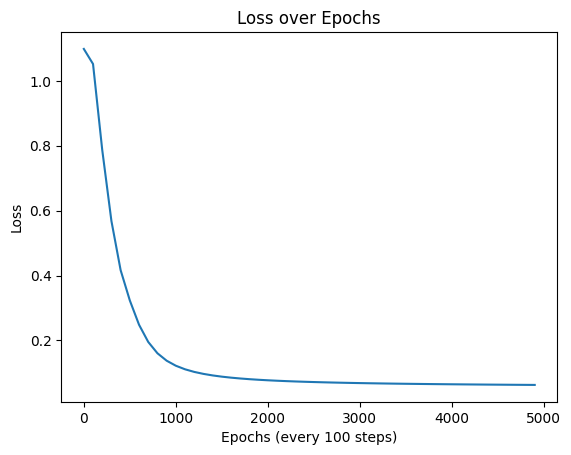

Testing the network...
Accuracy: 100.00%


In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Load the Iris dataset
iris_data = load_iris()
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)  # Convert target to a column vector

# One Hot encode the class labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y_)

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)

# Initialize the Neural Network
nn = NeuralNetwork(input_size=4, hidden_size=20, output_size=3, learning_rate=0.025)

# Train the network
print("Training the network...")
nn.train(train_x, train_y, epochs=5000)

# Test the network
print("Testing the network...")
y_pred = nn.forward(test_x)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
test_y_labels = np.argmax(test_y, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_labels == test_y_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")
